# Modelos de Regresión Lineal

## Objetivos:

Aplicar técnicas de regresión lineal para analizar relaciones entre variables, utilizando Python como herramienta de apoyo.

*Nota: Este laboratorio está diseñado para desarrollar razonamiento estadístico. Evita el uso de herramientas de IA para responder las preguntas a menos que esto sea explícitamente sugerido* 🤖. *En su lugar, enfócate en aplicar los conceptos revisados.*

## Actividad 1

Trabajas como analista de datos en el equipo de marketing digital de una tienda online del Reino Unido especializada en productos electrónicos y artículos de lujo. En el contexto de esta empresa, las ventas dependen de la cantidad de visitas que recibe el sitio web. El gerente de ventas está evaluando si conviene aumentar la inversión en campañas publicitarias para atraer más usuarios. Para ello, te entrega una base de datos con el número de visitas diarias al sitio y las ventas totales por día (en libras esterlinas). El gerente te solicita que analices la relación entre ambas variables y proporciones evidencia, basada en los datos disponibles, que respalde esta dependencia.

Para esto puedes descargar la base de datos **<a href="https://docs.google.com/spreadsheets/d/1bmYIXcn3SPyrJHi6IWzvj2t_fSkn6pyj/export?format=xlsx">aquí</a>** y responder las siguientes preguntas:

1. Muestra las tres primeras filas de la base de datos.

In [2]:
import pandas as pd
df_1 = pd.read_excel('Base6_1.xlsx')

In [2]:
#Primeras 3 filas
df_1.head(3)

,fecha,visitas_diarias,ventas_diarias
0,2010-12-01,121,46376.49
1,2010-12-02,137,47316.53
2,2010-12-03,57,23921.71


2. Calcula la covarianza y el coeficiente de correlación lineal entre las visitas diarias y las ventas diarias utilizando los datos disponibles. ¿Qué indican estos resultados en cuanto a la relación entre las visitas al sitio web y las ventas?

In [3]:
#Cálculo de Covarianza
covar_1 = df_1['visitas_diarias'].cov(df_1['ventas_diarias'])

#Cálculo de Coeficiente de correlación lineal de Pearson
correlacion_1 =df_1['visitas_diarias'].corr(df_1['ventas_diarias'])

print(f'Covarianza: {covar_1:.1f}\nCorrelación lineal de Pearson: {correlacion_1:.1f}')

Covarianza: 265561.8
Correlación lineal de Pearson: 0.6


La covarianza entre las variables es positiva (265.561,8) lo que indica que existe una relación directa entre las variables, es decir, a mayor cantidad de visitas diarias al sitio web, mayor es el monto de ventas diarias.

El coeficiente de correlación lineal de Pearson es 0,6, lo que indica una relación lineal positiva de intensidad moderada. Las variables tienden a aumentar juntas, aunque no perfectamente alineadas.


3. Encuentra el modelo de regresión lineal asociado a los datos e interpreta la pendiente.

In [4]:
#Importamos la biblioteca Numpy para realizar un ajuste lineal
import numpy as np

#Definimos las variables
v_indep_1 = df_1['visitas_diarias']
v_depen_1 = df_1['ventas_diarias']

#Aunque podríamos extraer directamente la pendiente e intercepto sin guardar el modelo,
#lo almacenamos en modelo_1 porque lo necesitaremos para calculos posteriores
modelo_1 = np.polyfit(v_indep_1, v_depen_1, 1)

pendiente_1, intercepto_1 = modelo_1

print(f'Pendiente: {pendiente_1:.2f}\nIntercepto: {intercepto_1:.2f}')

Pendiente: 431.86
Intercepto: 2971.69


El modelo de regresión lineal es:

$$y = 431,86x + 2971,69$$

La pendiente del modelo indica que por cada visita diaria en el sitio web, el monto de ventas aumenta diariamente en 431,86 libras esterlinas.

4. Genera un gráfico de dispersión que relacione las visitas diarias con las ventas diarias. Incorpora la línea de tendencia (regresión lineal) e incluye el modelo lineal en el gráfico. Luego, describe lo que observas.

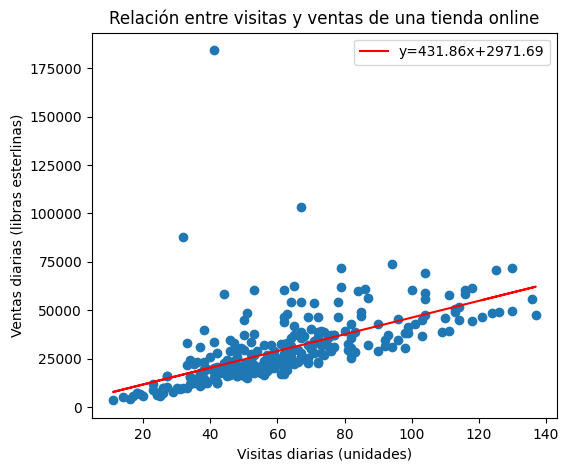

In [5]:
#Importamos la librería Matplotlib.pyplot para realizar el gráfico
import matplotlib.pyplot as plt

#Recordemos que las variables fueron definidas en el inciso anterior como:
v_indep_1 = df_1['visitas_diarias']
v_depen_1 = df_1['ventas_diarias']

#Creamos el gráfico de dispersión
fig,ax = plt.subplots(figsize = (6, 5))
dispersion_1 = ax.scatter(v_indep_1, v_depen_1)

# Línea de tendencia
ax.plot(v_indep_1, pendiente_1 * v_indep_1 + intercepto_1, color='red',
        label= f'y={pendiente_1:.2f}x+{intercepto_1:.2f}')

#Personalización
ax.set_title('Relación entre visitas y ventas de una tienda online')
ax.set_xlabel('Visitas diarias (unidades)')
ax.set_ylabel('Ventas diarias (libras esterlinas)')

ax.legend()
plt.show()

Se observa una tendencia al alza entre las ventas y visitas diarias, esto quiere decir que, cuando las visitas diarias aumentan, el monto de las ventas diarias tiende a aumentar.

5. Al observar la distancia de los puntos con la línea de tendencia ¿qué observas sobre la dispersión de los puntos respecto a la línea de tendencia?

Considerando la dispersión de los datos con respecto a la línea de tendencia, se puede observar que, aunque la mayoría de los puntos están cerca de esta, hay algunos que se alejan bastante. Esto indica que el modelo muestra una tendencia general, pero no predice con precisión cada valor. En conclusión, el modelo es una aproximación y no una representación perfecta de los datos.

6. Usando el modelo de regresión lineal determinado, estima las ventas que se generarían si el sitio recibiera 350 visitas en un día.

In [6]:
#Definimos el valor de x dado
x_1 = 350

#Calculamos el valor de y
y_1 = pendiente_1 * x_1 + intercepto_1

print(round(y_1,2))

154124.3


Para 350 visitas diarias, se estima que el monto de ventas diarias será de 154.124,3 libras esterlinas.

7. Calcula el coeficiente de determinación $R^{2}$ e interpreta su valor.

Para calcular el coeficiente de determinación ($R^{2}$) es necesario estimar los valores de la variable dependiente utilizando el modelo de regresión lineal obtenido. Para ello, utilizaremos la función *polyval* de la biblioteca *numpy*, la cual permite evaluar el modelo en todos los valores de la variable independiente.

Luego, usaremos la función *r2_score* de la biblioteca *sklearn.metrics* para comparar los valores reales de la variable dependiente con las predicciones del modelo.

In [7]:
#Importamos la función r2_score para calcular el coeficiente de determinación
from sklearn.metrics import r2_score

#Vamos a calcular las predicciones de las ventas con nuestro modelo
predicciones_ventas1 = np.polyval(modelo_1, df_1['visitas_diarias'])

#Calculamos en coeficiente de determinación
r2_1 = r2_score(df_1['ventas_diarias'], predicciones_ventas1)

print(f'Coeficiente de determinación: {r2_1 * 100:.1f}%')

Coeficiente de determinación: 36.0%


El coeficiente de determinación es 36%, esto indica que el 36% de la variabilidad en el monto vendido diariamente se puede explicar por las visitas diarias. El resto se debe a otros factores que no son incluidos en el modelo.

## Actividad 2

Un grupo de docentes tiene como objetivo analizar si existe una relación entre tiempo de estudio semanal (en horas) y el rendimiento académico de los estudiantes en la nota obtenida en una evaluación (en puntos). Para ello, se recopiló información de 200 estudiantes pertenecientes a carreras del área informática de un instituto profesional.

Descarga la base de datos **<a href="https://drive.google.com/uc?export=download&id=1ATKPCSFq2xcGzEUme2jEHKsSYcaf75LO
">aquí</a>** y responde las siguientes preguntas:

1. Explora la base de datos y muestra las primeras 5 filas del DataFrame.

In [9]:
import pandas as pd
df_2 = pd.read_csv('Base6_2.csv')

In [10]:
#Mostramos las primeras 5 filas de la base de datos
df_2.head()

,horas_estudio,nota
0,6,2.1
1,19,3.7
2,28,6.0
3,14,3.7
4,10,3.4


2. ¿Cuál es la variable dependiente y cuál la independiente en el análisis que los docentes planean desarrollar?

De acuerdo con el estudio que realizarán los docentes, la variable dependiente es la **Nota** de la evaluación y la variable independiente corresponde a las **Horas de estudio** semanales.

3. Calcula la covarianza y el coeficiente de correlación lineal de Pearson. Considerando estos valores, comenta cómo es la relación entre las variables.

In [11]:
#Cálculo de la covarianza
covar_2 = df_2['horas_estudio'].cov(df_2['nota'])

#Cálculo de Coeficiente de correlación lineal de Pearson
correlacion_2 =df_2['horas_estudio'].corr(df_2['nota'])

print(f'Covarianza: {covar_2:.1f}\nCorrelación lineal de Pearson: {correlacion_2:.2f}')

Covarianza: 15.7
Correlación lineal de Pearson: 0.97


La covarianza entre las variables es positiva (15,7) lo que indica que existe una relación directa entre las variables, es decir, mientras mayor sea la cantidad de horas de estudio en la semana, la nota en la evaluación tiende a aumentar.

El coeficiente de correlación lineal de Pearson es 0,97, lo que indica una relación lineal positiva fuerte. Las variables tienden a aumentar juntas.

4. Determina el modelo de regresión lineal correspondiente a los datos e interpreta el valor de la pendiente.

In [12]:
import numpy as np

#Definición de variables
v_depen_2 = df_2['nota']
v_indep_2 = df_2['horas_estudio']

#Calculamos un ajuste lineal con polyfit
modelo_2 = np.polyfit(v_indep_2, v_depen_2, 1)

#Asignamos el primer valor del ajuste a la variable pendiente_2 y
#el segundo valor a la variable intercepto_2
pendiente_2, intercepto_2 = modelo_2

print(f'Pendiente: {pendiente_2:.2f}\nIntercepto: {intercepto_2:.2f}')



Pendiente: 0.18
Intercepto: 1.02


El modelo de regresión lineal es:

$$y = 0,18x + 1,02$$


La pendiente del modelo indica que la nota mejora en 0,18 puntos por cada hora de estudio adicional a la semana.

5. Genera un gráfico de dispersión que represente la relación entre las variables. Incorpora la línea de tendencia (regresión lineal) e incluye el modelo lineal en el gráfico. Luego, comenta lo observado.

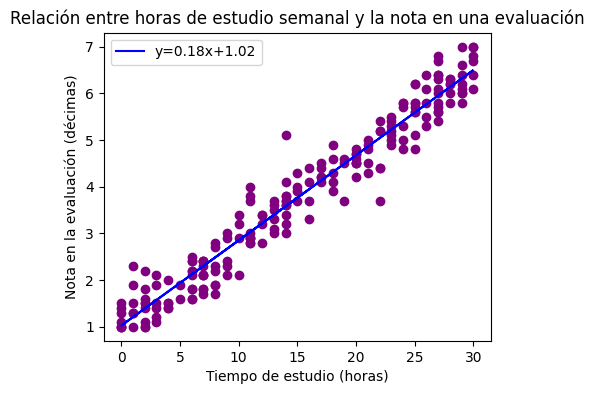

In [13]:
import matplotlib.pyplot as plt

#Recordemos que las variables fueron definidas en el inciso anterior como:
v_depen_2 = df_2['nota']
v_indep_2 = df_2['horas_estudio']

#Gráfico
fig, ax = plt.subplots(figsize = (5,4))
dispersion_2 = ax.scatter(v_indep_2, v_depen_2, color = 'purple')

# Línea de tendencia
ax.plot(v_indep_2, pendiente_2 * v_indep_2 + intercepto_2, color='blue',
        label= f'y={pendiente_2:.2f}x+{intercepto_2:.2f}')

#Personalización
ax.set_title('Relación entre horas de estudio semanal y la nota en una evaluación')
ax.set_xlabel('Tiempo de estudio (horas)')
ax.set_ylabel('Nota en la evaluación (décimas)')

plt.legend()
plt.show()

Se observa una relación lineal entre las variables, lo que indica que, a mayor tiempo de estudio semanal, la nota en la evaluación tiende a aumentar. Este análisis es coherente con lo interpretado en el inciso anterior.

6. Observando el gráfico, estime la nota de un estudiante que dedica 20 horas semanales al estudio y de otro que estudia solo 3 horas. Compare posteriormente estos valores con las estimaciones generadas por el modelo lineal determinado.

Según el gráfico y la línea de tendencia, un estudiante que estudia 20 horas obtendría aproximadamente un 4,5, y uno que estudia 3 horas, un 1,5 aproximadamente. Esto se puede estimar al ubicar el valor en el eje horizontal y proyectar hacia la línea de tendencia.

Para predecir la nota de un estudiante que estudia 20 horas semanales utilizando el modelo encontrado en el inciso anterior, reemplazamos el valor de $x$ por 20. Luego, repetimos el procedimiento para $x$ igual a  3.

In [14]:
#Definimos los valores de x dados
x_2 = 20
x_3 = 3

#Calculamos los valores de y
y_2 = pendiente_2 * x_2 + intercepto_2
y_3 = pendiente_2 * x_3 + intercepto_2

print(f'y\u2082= {round(y_2,1)}\ny\u2083 = {round(y_3,1)}' )

y₂= 4.7
y₃ = 1.6


Si un estudiante dedica 20 horas de estudio en la semana se espera que su nota sea un 4,7 en la evaluación. Mientras que uno que estudia 3 horas en la semana su nota esperada según el modelo encontrado es 1,6. Las predicciones encontradas son muy similares a lo estimado visualmente.

7. ¿Es útil este modelo para predecir? Justifica utilizando el coeficiente de determinación ($R^{2}$).

In [15]:
#Importamos la función r2_score para calcular el coeficiente de determinación
from sklearn.metrics import r2_score

#Calculamos las predicciones de la variable dependiente utilizando el modelo encontrado
predicciones_notas = np.polyval(modelo_2, v_indep_2)

#Calculamos el R^2
r2_2 = r2_score(df_2['nota'], predicciones_notas)

print(f'Coeficiente de determinación: {r2_2 * 100:.1f}%')

Coeficiente de determinación: 94.9%


Este modelo es útil para predecir, ya que el 94,9% de la variabilidad en las notas puede explicarse por la cantidad de horas de estudio semanales. El resto se debe a otros factores no considerados en el modelo.

## Actividad 3

Una empresa de servicios técnicos desea analizar cómo influye el número de trabajadores asignados a un proyecto en el tiempo total (en horas) requerido para completarlo. Para ello, ha recopilado información de 150 proyectos técnicos de mediana envergadura, como instalaciones de redes, montajes de hardware y configuraciones masivas.


Descargar la base de datos **<a href="https://docs.google.com/spreadsheets/d/1HQgGNDwDGoDqCU5YECgwNh724iLgUORz/export?format=xlsx">aquí</a>** y responde las siguientes preguntas:

1. Muestra las primeras cinco filas de la base de datos.

In [17]:
import pandas as pd
df_3 = pd.read_excel('Base6_3.xlsx')
df_3.head()

,trabajadores,tiempo_total
0,20,24.7
1,14,45.9
2,5,65.0
3,14,49.0
4,2,71.9


2. ¿Qué representa cada fila de la base de datos?

Cada fila representa un proyecto técnico, indicando la cantidad de trabajadores que participaron en el proyecto y el tiempo de demoraron en terminarlo.

3. Al analizar la relación entre la cantidad de trabajadores y el tiempo total del proyecto, ¿cuál es la variable dependiente? ¿Y la independiente?

La variable dependiente corresponde al tiempo de duración total del proyecto, mientras que la variable independiente corresponde a la cantidad de trabajadores.

4. Calcula la covarianza y el coeficiente de correlación lineal de Pearson entre las variables e interpreta los resultados.

In [18]:
#Cálculo de la covarianza
covar_3 = df_3['trabajadores'].cov(df_3['tiempo_total'])

#Cálculo de Coeficiente de correlación lineal de Pearson
correlacion_3 =df_3['trabajadores'].corr(df_3['tiempo_total'])

print(f'Covarianza: {covar_3:.1f}\nCorrelación lineal de Pearson: {correlacion_3:.2f}')

Covarianza: -65.8
Correlación lineal de Pearson: -0.93


La covarianza es un valor negativo (-65,8) esto indica que existe una relación inversa entre las variables. El coeficiente de correlación lineal de Pearson es -0,93, lo que indica una relación lineal negativa fuerte entre las variables. En conclusión, ambos indicadores señalan que, en general, cuando una variable aumenta, la otra tiende a  disminuir.

5. Determina el modelo de regresión lineal y luego interpreta el valor de la pendiente.

In [19]:
import numpy as np

#Definición de variables
v_depen_3 = df_3['tiempo_total']
v_indep_3 = df_3['trabajadores']

#Realizamos un ajuste lineal
modelo_3 = np.polyfit(v_indep_3, v_depen_3, 1)

#Definimos la variable pendiente_3 e intercepto_3 como el primer y segundo
#coeficiente respectivamente del arreglo modelo_3
pendiente_3, intercepto_3 = modelo_3

print(f'Pendiente: {pendiente_3:.1f}\nIntercepto: {intercepto_3:.1f}')

Pendiente: -2.6
Intercepto: 81.6


El modelo de regresión es:

$$y=-2,6x + 81,6$$

El valor de la pendiente indica que, por cada trabajador que se agregue al proyecto, el tiempo total disminuye en 2,6 horas.

6. Genera un gráfico de dispersión que represente la relación entre las variables. Incorpora la línea de tendencia (regresión lineal) e incluye el modelo lineal en el gráfico. Comenta lo observado.

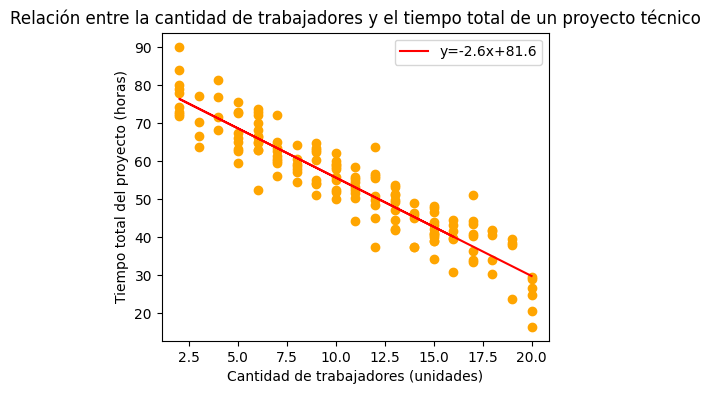

In [20]:
import matplotlib.pyplot as plt

#Recordemos que las variables fueron definidas en el inciso anterior como:
v_depen_3 = df_3['tiempo_total']
v_indep_3 = df_3['trabajadores']

#Gráfico
fig, ax = plt.subplots(figsize = (5,4))
dispersion_3 = ax.scatter(v_indep_3, v_depen_3, color = 'orange')

ax.plot(v_indep_3, pendiente_3 * v_indep_3 + intercepto_3, color='red',
        label= f'y={pendiente_3:.1f}x+{intercepto_3:.1f}')

#Personalización
ax.set_title('Relación entre la cantidad de trabajadores y el tiempo total de un proyecto técnico')
ax.set_xlabel('Cantidad de trabajadores (unidades)')
ax.set_ylabel('Tiempo total del proyecto (horas)')

plt.legend()
plt.show()

Se observa una relación lineal decreciente entre las variables: a medida que aumenta la cantidad de trabajadores asignados a un proyecto, el tiempo total para terminarlo tiende a disminuir.

7. Utiliza el modelo para estimar la duración de un proyecto que cuente con:
* 10 trabajadores.
* 15 trabajadores.
* 18 trabajadores.

In [21]:
#Definimos los valores de x que serán evaluados en el modelo
x_4 = 10
x_5 = 15
x_6 = 18

#Calculamos los valores estimados de y
y_4 = pendiente_3 * x_4 + intercepto_3
y_5 = pendiente_3 * x_5 + intercepto_3
y_6 = pendiente_3 * x_6 + intercepto_3

print(f'y\u2084= {round(y_4,1)}\ny\u2085 = {round(y_5,1)}\ny\u2086 = {round(y_6,1)}' )

y₄= 55.7
y₅ = 42.7
y₆ = 35.0


Se estima que un proyecto que cuenta con 10 trabajadores, demora 55,7 horas en completarse. Uno con 15 trabajadores, demora 42,7 horas en completarse. Finalmente, uno que cuenta con 18 trabajadores, demora 35,0 horas en completarse.

8. ¿Qué porcentaje de la variabilidad en el tiempo total de ejecución de los proyectos se explica por la cantidad de trabajadores asignados? Justifique su respuesta.

Para responder esta pregunta es necesario calcular el coeficiente de determinación $R^{2}$:

In [22]:
#Importamos la función r2_score para calcular el coeficiente de determinación
from sklearn.metrics import r2_score

#Calculamos las predicciones de la variable dependiente utilizando el modelo encontrado
predicciones_tiempo = np.polyval(modelo_3, v_indep_3)

#Calculamos el R^2
r2_3 = r2_score(df_3['tiempo_total'], predicciones_tiempo)

print(f'Coeficiente de determinación: {r2_3 * 100:.1f}%')

Coeficiente de determinación: 86.2%


Un 86,2% de la variabilidad del tiempo total del desarrollo de un proyecto de mediana envergadura puede ser explicada por la cantidad de trabajadores asignados.

## Actividad 4

Una empresa de tecnología implementó un programa de formación continua para sus trabajadores. El objetivo es analizar si existe una relación entre el tiempo de formación recibido (en horas) y el puntaje obtenido en la evaluación de desempeño en una prueba interna (en puntos). El análisis se realizó por separado en dos áreas: Soporte Técnico y Desarrollo Web, registrando en cada caso las horas de formación y el puntaje obtenido por cada trabajador.

Tu tarea consiste en analizar estas relaciones y determinar en qué área la formación tiene un mayor impacto sobre el desempeño.

Puedes descargar la base de datos **<a href="https://drive.google.com/uc?export=download&id=1hcrtBDxzmLDxjFWzKvvS-4YPgGDT4lfR
">aquí</a>.**

1. Carga la base de datos y muestra sus primeras 6 filas.

In [24]:
import pandas as pd
df_4 = pd.read_csv('Base6_4.csv')

df_4.head(6)

,horas_formacion,puntaje_soporte,puntaje_desarrollo
0,30,72.7,69.4
1,18,57.1,59.8
2,30,77.2,78.6
3,12,44.8,48.7
4,3,49.4,31.7
5,19,59.0,64.7


2. Considerando que debes encontrar dos modelos de regresión lineal, ¿qué variables intervienen en cada uno de ellos y cuál corresponde a la variable dependiente en cada caso?

Las variables involucradas en el primer modelo son:
* Variable dependiente: Puntaje del área de soporte técnico (puntos).
* Variable independiente: Tiempo de formación (horas).

Las variables involucradas en el segundo modelo son:
* Variable dependiente: Puntaje del área de desarrollo web (puntos).
* Variable independiente: Tiempo de formación (horas).

3. Determina el modelo de regresión lineal para cada departamento e interpreta el valor de la pendiente de cada uno.

In [10]:
import numpy as np

#Variables
v_depen_4a = df_4['puntaje_soporte']
v_depen_4b = df_4['puntaje_desarrollo']
v_indep_4 = df_4['horas_formacion']

#Realizamos un ajuste lineal para cada área
modelo_4a = np.polyfit(v_indep_4, v_depen_4a, 1)
modelo_4b = np.polyfit(v_indep_4, v_depen_4b, 1)

#Definimos la variable pendiente_4a e intercepto_4a como el primer y segundo
#coeficiente respectivamente del arreglo modelo_4a, repetimos para el modelo_4b
pendiente_4a, intercepto_4a = modelo_4a
pendiente_4b, intercepto_4b = modelo_4b

print(f'Modelo del área de soporte técnico:\nPendiente: {pendiente_4a:.1f}, intercepto: {intercepto_4a:.1f}')
print(f'\nModelo del área de desarrollo web:\nPendiente: {pendiente_4b:.1f}, intercepto: {intercepto_4b:.1f}')

Modelo del área de soporte técnico:
Pendiente: 1.0, intercepto: 41.0

Modelo del área de desarrollo web:
Pendiente: 1.6, intercepto: 29.2


**Modelo del área de soporte técnico**
$$y=1,0x + 41,0$$

El valor de la pendiente indica que, por cada hora adicional en formación continua, el puntaje en la evaluación aumenta en 1 punto en el área de soporte técnico.

**Modelo del área de desarrollo web**
$$y=1,6x + 29,2$$

El valor de la pendiente indica que, por cada hora adicional en formación continua, el puntaje en la evaluación aumenta en 1,6 puntos en el área de desarrollo web.

4. Elabora dos gráficos de dispersión: uno que muestre la relación entre el tiempo de formación y el puntaje en el área de Desarrollo Web, y otro que refleje la misma relación en el área de Soporte Técnico. Posteriormente, describe las observaciones obtenidas.

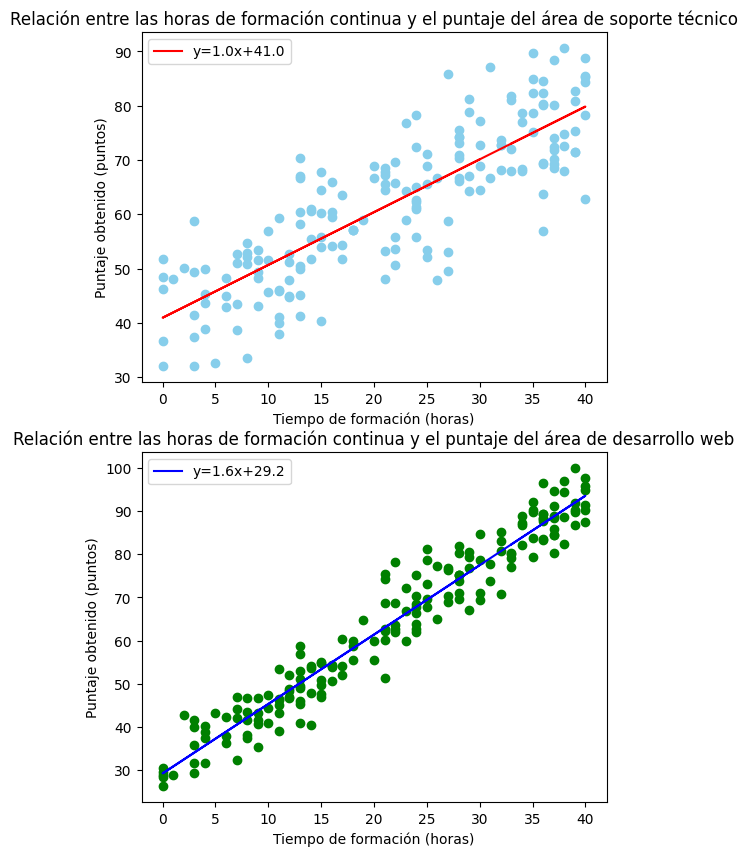

In [12]:
import matplotlib.pyplot as plt

#Variables
v_depen_4a = df_4['puntaje_soporte']
v_depen_4b = df_4['puntaje_desarrollo']
v_indep_4 = df_4['horas_formacion']

#Crea una figura con dos gráficos ax1 y ax2
#Los gráficos serán mostrados en 2 filas y 1 columna
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6, 10))

#Gráfico del primer modelo (Soporte Técnico)
dispersion_4a = ax1.scatter(v_indep_4, v_depen_4a, color = 'skyblue')
#Línea de tendencia
ax1.plot(v_indep_4, pendiente_4a * v_indep_4 + intercepto_4a, color='red',
         label= f'y={pendiente_4a:.1f}x+{intercepto_4a:.1f}')

#Gráfico del segundo modelo (Desarrollo Web)
dispersion_4b = ax2.scatter(v_indep_4, v_depen_4b, color = 'green')
#Línea de tendencia
ax2.plot(v_indep_4, pendiente_4b * v_indep_4 + intercepto_4b, color='blue',
         label= f'y={pendiente_4b:.1f}x+{intercepto_4b:.1f}')


#Personalización
ax1.set_title('Relación entre las horas de formación continua y el puntaje del área de soporte técnico')
ax2.set_title('Relación entre las horas de formación continua y el puntaje del área de desarrollo web')
ax1.set_xlabel('Tiempo de formación (horas)')
ax2.set_xlabel('Tiempo de formación (horas)')
ax1.set_ylabel('Puntaje obtenido (puntos)')
ax2.set_ylabel('Puntaje obtenido (puntos)')

ax1.legend()
ax2.legend()
plt.show()



En ambos gráficos se observa una relación directa, esto quiere decir que, en ambas áreas de trabajo a mayor cantidad de horas de formación, el puntaje obtenido en la evaluación tiene a aumentar. Además, es posible observar que los puntajes del área de soporte técnico están más dispersos que los del área de desarrollo web.

5. ¿En cuál de las dos áreas (Soporte Técnico o Desarrollo Web) la correlación entre el tiempo de formación y el puntaje es más fuerte? Justifica realizando el cálculo apropiado.

Para responder esta pregunta calcularemos el coeficiente de correlación lineal de Pearson:

In [13]:
#Cálculo de Coeficiente de correlación lineal de Pearson para el área de soporte
correlacion_4a = df_4['horas_formacion'].corr(df_4['puntaje_soporte'])

#Cálculo de Coeficiente de correlación lineal de Pearson para el área de desarrollo
correlacion_4b = df_4['horas_formacion'].corr(df_4['puntaje_desarrollo'])

print(f'Correlación lineal de Pearson del área de soporte técnico: {correlacion_4a:.2f}')
print(f'Correlación lineal de Pearson del área de desarrollo web: {correlacion_4b:.2f}')

Correlación lineal de Pearson del área de soporte técnico: 0.83
Correlación lineal de Pearson del área de desarrollo web: 0.97


Ambas áreas muestran una correlación lineal fuerte, ya que sus coeficientes son cercanos a 1. Sin embargo, el área de desarrollo web presenta una correlación más fuerte, con un coeficiente de 0,97 comparado con 0,83 en el área de soporte técnico.

6. ¿En cuál de las dos áreas el modelo de regresión describe mejor la relación entre el tiempo de formación y el puntaje? Justifica tu respuesta.

In [ ]:
#Importamos la función r2_score para calcular el coeficiente de determinación
from sklearn.metrics import r2_score

#Calculamos las predicciones de la variable dependiente utilizando los modelos encontrados
pred_puntaje_soporte = np.polyval(modelo_4a, v_indep_4)
pred_puntaje_desarrollo = np.polyval(modelo_4b, v_indep_4)

#Calculamos los valores de R^2
r2_4a = r2_score(df_4['puntaje_soporte'], pred_puntaje_soporte)
r2_4b = r2_score(df_4['puntaje_desarrollo'], pred_puntaje_desarrollo)

print(f'Coeficiente de determinación del área de soporte: {r2_4a * 100:.1f}%')
print(f'\nCoeficiente de determinación del área de desarrollo: {r2_4b * 100:.1f}%')

Coeficiente de determinación del área de soporte: 68.7%

Coeficiente de determinación del área de desarrollo: 94.0%


El modelo que mejor describe la relación entre tiempo de formación y el puntaje es el del área de Desarrollo Web, ya que su coeficiente de determinación es mayor (94% frente a 68,7% del área de soporte técnico).

Esto indica que en Desarrollo Web, el tiempo de formación permite predecir el puntaje con mayor precisión que en Soporte Técnico.